In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns

# Importing the dataset

dataset = pd.read_csv('electronics_cleaned.csv')

# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0,6.0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0,6.0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0,6.0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0,7.0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999.0,NaN,0.0,7.0


In [5]:
dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
933492,8041,840575,5.0,2016-08-30,Male,Car Electronics & GPS,Pyle,2016.0,NaN,0.0,8.0
933493,5951,840576,5.0,2016-08-30,Female,Headphones,Etre Jeune,2016.0,NaN,0.0,8.0
933494,5951,840577,5.0,2016-08-30,Female,Headphones,Etre Jeune,2016.0,Male,0.0,8.0
933495,9152,200429,5.0,2016-08-30,Male,Accessories & Supplies,NaN,2016.0,Male,2.0,8.0
933496,9086,840578,5.0,2016-08-30,Male,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# shape

dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933497 entries, 0 to 933496
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   item_id     933497 non-null  int64  
 1   user_id     933497 non-null  int64  
 2   rating      933497 non-null  float64
 3   timestamp   933497 non-null  object 
 4   model_attr  933497 non-null  object 
 5   category    933496 non-null  object 
 6   brand       247096 non-null  object 
 7   year        933496 non-null  float64
 8   user_attr   128208 non-null  object 
 9   split       933496 non-null  float64
 10  month       933496 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 78.3+ MB


In [8]:
from datetime import datetime

pd.to_datetime(dataset['timestamp'])

,timestamp
0,1999-06-13
1,1999-06-14
2,1999-06-17
3,1999-07-01
4,1999-07-06
...,...
933492,2016-08-30
933493,2016-08-30
933494,2016-08-30
933495,2016-08-30


In [9]:
dataset['brand'] = dataset['brand'].astype(str)
# We can also see that the column Category is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['category'] = dataset['category'].astype(str)
# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
# We can also see that the column Rating is of int64 data type, but it is actually a float.

# We can convert it to a float using the following code:

dataset['rating'] = dataset['rating'].astype(float)
dataset['user_id'] = dataset['user_id'].astype(str)
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['item_id'] = dataset['item_id'].astype(str)
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

dataset.describe()

,rating,timestamp,year,split,month
count,933497.000000,933497,933496.000000,933496.000000,933496.000000
mean,4.063216,2014-09-07 20:51:35.122962688,2014.205562,0.156827,6.286128
min,1.000000,1999-06-13 00:00:00,1999.000000,0.000000,1.000000
25%,4.000000,2014-02-04 00:00:00,2014.000000,0.000000,3.000000
50%,5.000000,2015-03-21 00:00:00,2015.000000,0.000000,6.000000
75%,5.000000,2015-12-13 00:00:00,2015.000000,0.000000,9.000000
max,5.000000,2016-08-30 00:00:00,2016.000000,2.000000,12.000000
std,1.357370,NaN,1.972538,0.520896,3.525266


In [10]:
dataset.nunique()

,0
item_id,9405
user_id,840579
rating,5
timestamp,5595
model_attr,3
category,11
brand,51
year,18
user_attr,2
split,3


In [11]:
dataset.duplicated().sum()

np.int64(0)

In [12]:
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,1
user_attr,805289
split,1


In [13]:
dataset['rating'].value_counts()

,count
rating,
5.0,540212
4.0,164830
1.0,98376
3.0,74086
2.0,55993


In [14]:
dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset['year'].value_counts()

,count
year,
2015,320887
2016,215868
2014,180676
2013,99855
2012,38389
2011,23894
2010,16888
2009,12804
2008,9428


In [15]:
dataset['month'] = pd.DatetimeIndex(dataset['timestamp']).month

dataset['month'].value_counts()

,count
month,
1,99965
8,88480
12,86554
7,85433
3,83185
2,80147
6,73665
5,73532
4,71108


In [16]:
dataset.dropna(inplace=True)

# check for missing values

dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
model_attr,0
category,0
brand,0
year,0
user_attr,0
split,0


<Axes: xlabel='rating', ylabel='count'>

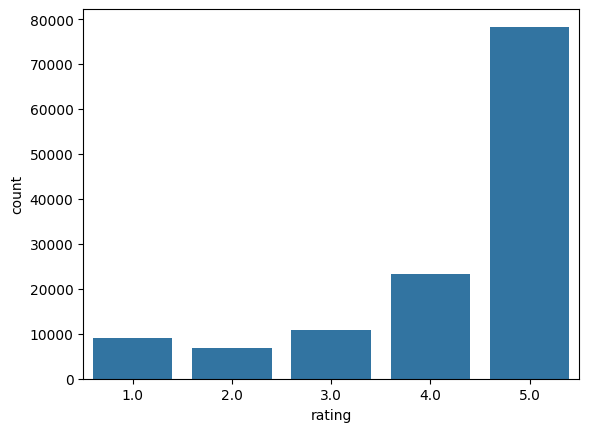

In [17]:
sns.countplot(x='rating', data=dataset)

In [18]:

dataset['rating'].value_counts()

,count
rating,
5.0,78318
4.0,23247
3.0,10853
1.0,9040
2.0,6750


<Axes: xlabel='year', ylabel='count'>

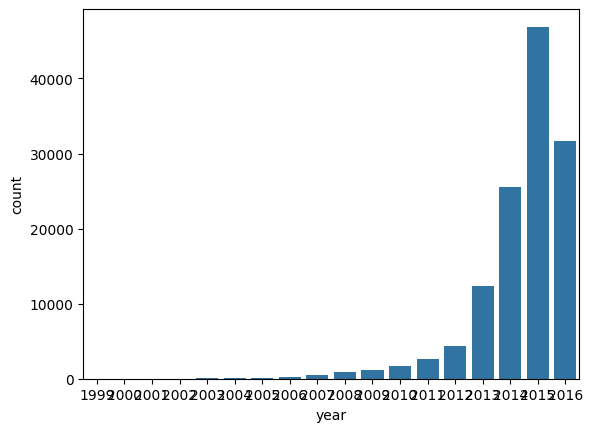

In [19]:
sns.countplot(x='year', data=dataset)


<Axes: xlabel='brand', ylabel='count'>

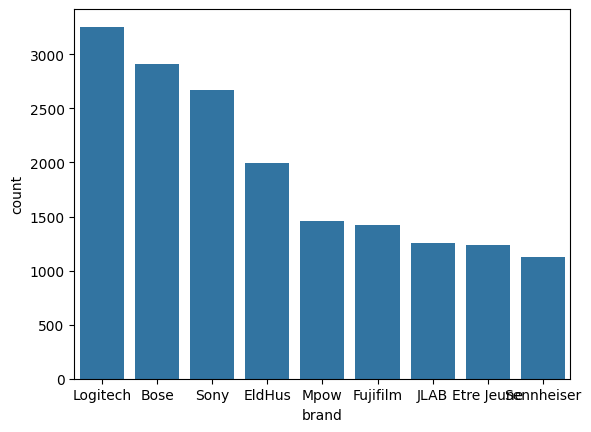

In [20]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='brand', ylabel='count'>

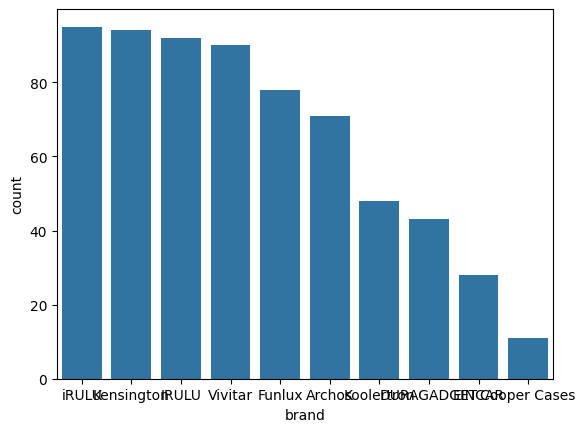

In [21]:
sns.countplot(x='brand', data=dataset, order=dataset['brand'].value_counts().iloc[-10:].index)

<Axes: xlabel='brand', ylabel='count'>

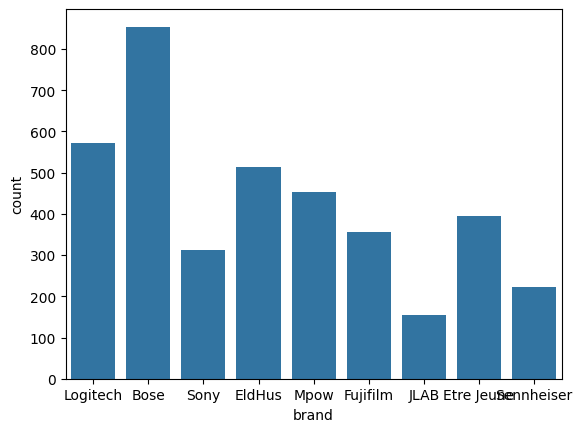

In [22]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2016], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: >

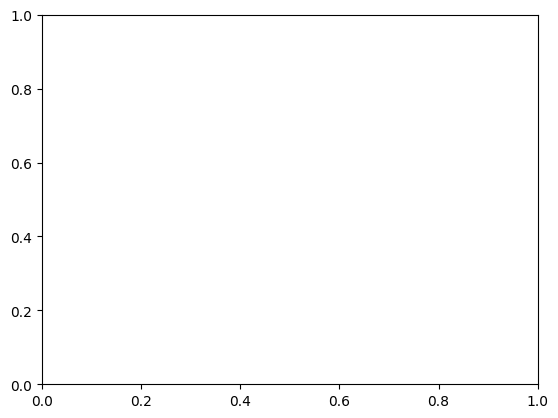

In [23]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2017], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: >

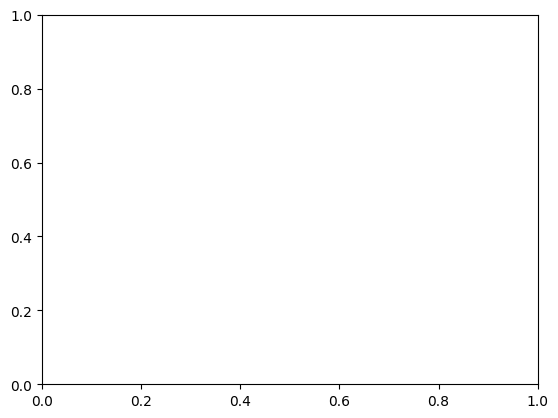

In [24]:
sns.countplot(x='brand', data=dataset[dataset['year'] == 2018], order=dataset['brand'].value_counts().iloc[1:10].index)

<Axes: xlabel='month', ylabel='count'>

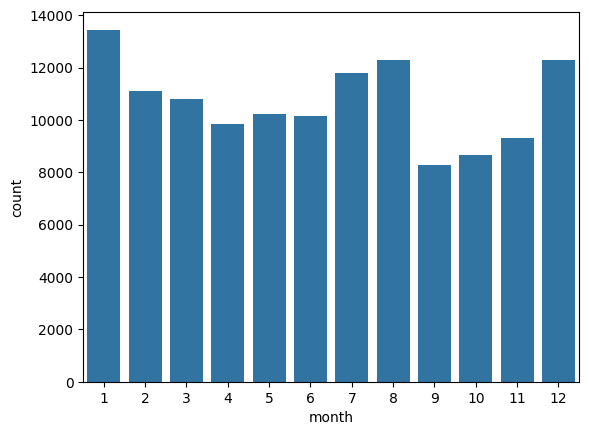

In [25]:
sns.countplot(x='month', data=dataset)

<Axes: xlabel='category', ylabel='count'>

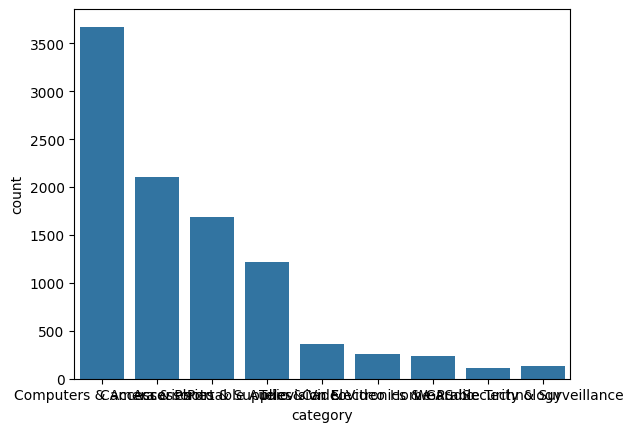

In [26]:
sns.countplot(x='category', data=dataset[dataset['month'] == 1], order=dataset['category'].value_counts().iloc[1:10].index)

<Axes: xlabel='category', ylabel='count'>

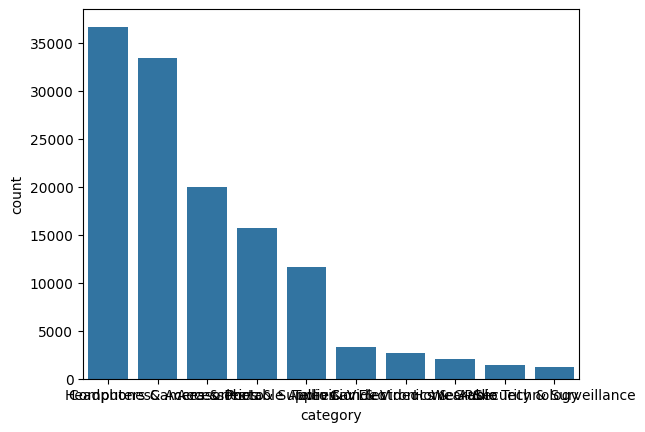

In [27]:

sns.countplot(x='category', data=dataset, order=dataset['category'].value_counts().iloc[-10:].index)

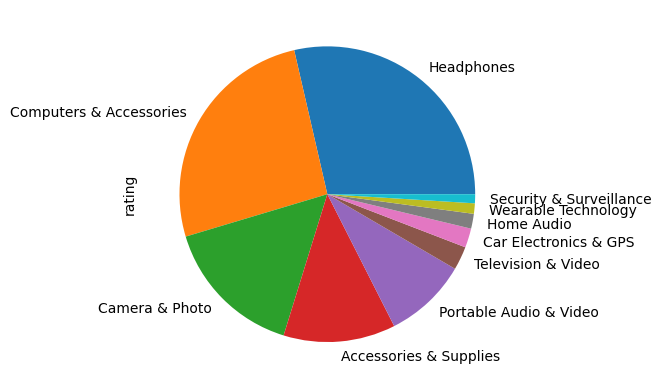

In [28]:
dataset['category'].value_counts(normalize=True)
dataset.groupby('category')['rating'].count().sort_values(ascending=False).head(10).plot(kind='pie')

# white background

sns.set_style('white')